In [209]:
import pandas as pd
import numpy as np

In [210]:
df=pd.read_csv(r"D:\itvedant\Vscode\CO2 Emissions.csv")

In [211]:
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [212]:
df.shape

(7385, 12)

In [213]:
df.size

88620

In [214]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [215]:
df.duplicated().sum()

1103

In [216]:
df.drop_duplicates(inplace=True)

In [217]:
df.duplicated().sum()

0

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

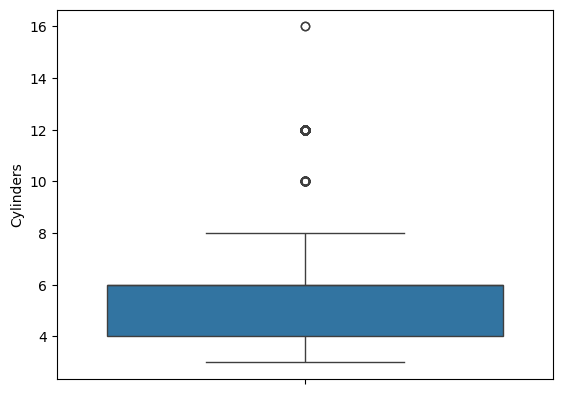

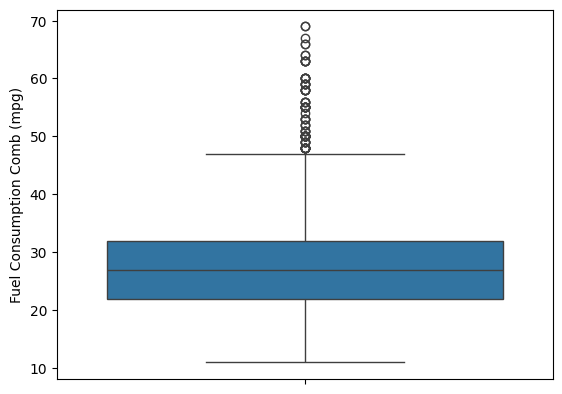

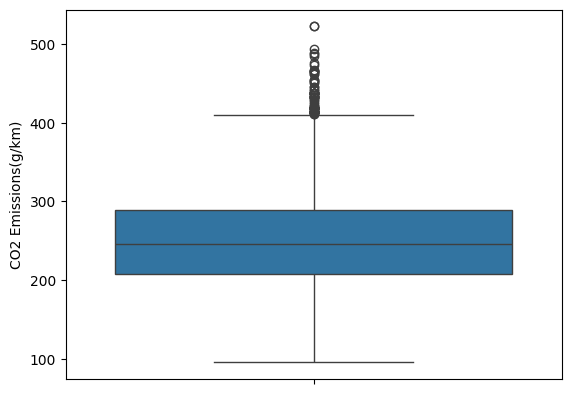

In [219]:
for col in num_col:
    sns.boxplot(data=df[col])
    plt.show()

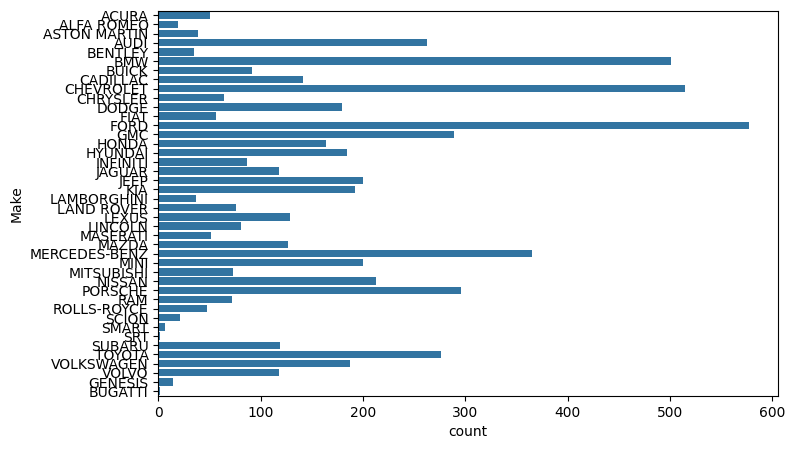

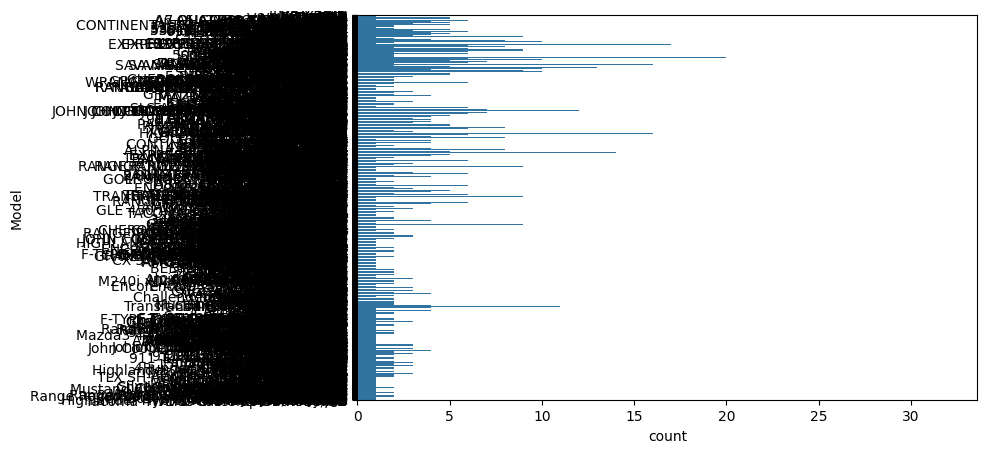

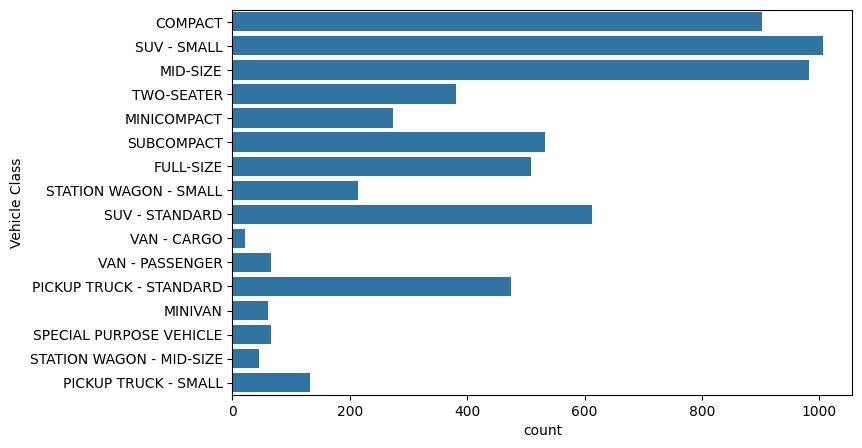

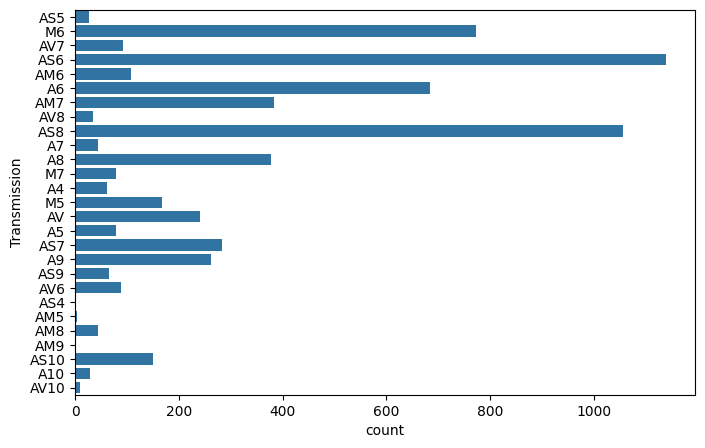

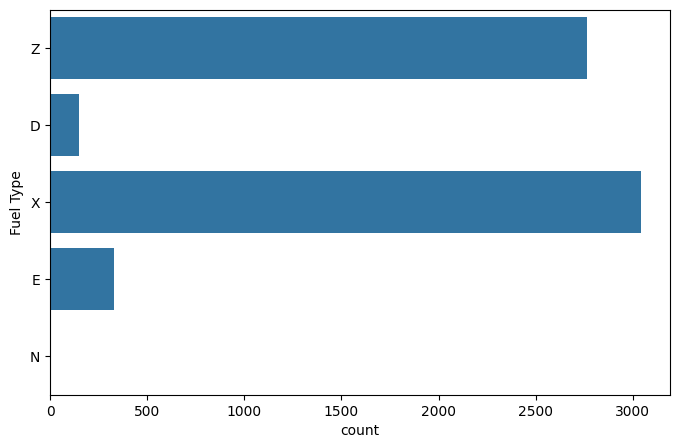

In [220]:
L=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

for col in L:
    plt.figure(figsize=(8,5))
    sns.countplot(df[col])
    plt.show()

In [221]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [222]:
df['Make'].unique().shape[0]

42

In [223]:
df['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [224]:
df['Model'].unique().shape[0]

2053

In [225]:
df.drop(['Make','Model','Transmission'],axis=1,inplace=True)

In [226]:
cat_col=df.select_dtypes('object')
num_col=df.select_dtypes('int64','float64')

In [227]:
df.head(2)

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221


In [228]:
from sklearn.preprocessing import LabelEncoder

In [229]:
le=LabelEncoder()

In [230]:
for col in cat_col:
    df[col]=le.fit_transform(df[[col]])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [231]:
df.head()

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,2.0,4,4,9.9,6.7,8.5,33,196
1,0,2.4,4,4,11.2,7.7,9.6,29,221
2,0,1.5,4,4,6.0,5.8,5.9,48,136
3,11,3.5,6,4,12.7,9.1,11.1,25,255
4,11,3.5,6,4,12.1,8.7,10.6,27,244


In [232]:
x=df.drop('CO2 Emissions(g/km)',axis=1)
y=df['CO2 Emissions(g/km)']

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [235]:
x_test.shape

(1257, 8)

In [236]:
x_train.shape

(5025, 8)

In [237]:
y_test.shape

(1257,)

In [238]:
y_train.shape

(5025,)

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
model=LinearRegression()

In [248]:
model.fit(x_train,y_train)

LinearRegression()

In [249]:
y_pred=model.predict(x_test)

In [250]:
y_pred

array([247.09172947, 257.92537062, 285.0358437 , ..., 302.38325339,
       189.44656747, 201.58035756])

In [251]:
model.score(x_test,y_test)

0.9099003804818011

In [252]:
model.score(x_train,y_train)

0.9170185605174883